*Copyright (c) Meta Platforms, Inc. and affiliates. This source code is licensed under the license found in the LICENSE file in the root directory of this source tree.*

## TL;DR

In [4]:
from data_gen.pretrain.id_gen import IdGen
from tools.tools import tokenizer, fix_seed
from typing import Literal

def get_prob_sol_ans_triple(tpy: Literal["med", "hard"]):
    assert tpy in ["med", "hard"], "Invalid type: Choose 'med' or 'hard'"
    # Set parameters based on difficulty
    max_op = 15 if tpy == "med" else 21
    max_edge = 20 if tpy == "med" else 28

    id_gen = IdGen(
        max_op=max_op,        # Maximum # of operations
        max_edge=max_edge,    # Maximum # of edges (instance parameters) in the structure graph
        perm_level=5,         # Random shuffle level for problem description
        detail_level=0        # Most detailed solution format
    )

    id_gen.gen_prob([i for i in range(23)], p_format="pq")

    return id_gen

# generate 10 med problems
fix_seed(42)
for i in range(10):
    id_gen = get_prob_sol_ans_triple("med")
    print(f"\n\nProblem {i}:")
    print(tokenizer.decode(id_gen.prob_token))
    print(f"Solution:")
    print(tokenizer.decode(id_gen.sol_token))
    print(f"Answer:")
    print(tokenizer.decode(id_gen.ans_token))



Problem 0:
 The number of each Penguin Beach's Giraffe equals 6. The number of each Octopus Den's Leopard equals each Octopus Den's Giraffe. The number of each Rockpool Exhibit's Leopard equals 20 more than the sum of each Octopus Den's Giraffe and each Octopus Den's Leopard. The number of each Rockpool Exhibit's Giraffe equals 8 times as much as the sum of each Octopus Den's Giraffe and each Octopus Den's Leopard. The number of each Octopus Den's Giraffe equals 21. How many Animal does Penguin Beach have?
Solution:
 Define Penguin Beach's Giraffe as e; so e = 6. Define Penguin Beach's Animal as J; so J = e = 6.
Answer:
 6


Problem 1:
 The number of each Padded Backpack's Fineliner equals 13 more than each Summit University's Counseling Room. The number of each Public Relations Studio's Casual Backpack equals 4. The number of each Summit University's Counseling Room equals 13. The number of each Casual Backpack's Crayon equals each Messenger Backpack's Stationery. The number of each

## Introduction

In [2]:
from data_gen.pretrain.id_gen import IdGen
from tools.tools import fix_seed

fix_seed(42)  # Ensures reproducibility

# Initialize IdGen with specific parameters
id_gen = IdGen(
    max_op=15,            # Maximum operations
    max_edge=20,          # Maximum edges in the Structure Graph
    perm_level=5,         # Level of randomization in problem description. 5 represents random shuffle
    detail_level=0        # Level of detail in the solution. 0 represents the most detailed solution format
)

# Generate a problem and format it
id_gen.gen_prob([i for i in range(23)], p_format="pq")

In [3]:
prob_id = id_gen.prob_token  # Problem's token IDs
sol_id = id_gen.sol_token    # Solution's token IDs
ans_id = id_gen.ans_token    # One-number answer's token IDs

In [4]:
from tools.tools import tokenizer
print("Problem:")
print(tokenizer.decode(prob_id))
print("Solution:")
print(tokenizer.decode(sol_id))
print("Answer:")
print(tokenizer.decode(ans_id))

Problem:
 The number of each Penguin Beach's Giraffe equals 6. The number of each Octopus Den's Leopard equals each Octopus Den's Giraffe. The number of each Rockpool Exhibit's Leopard equals 20 more than the sum of each Octopus Den's Giraffe and each Octopus Den's Leopard. The number of each Rockpool Exhibit's Giraffe equals 8 times as much as the sum of each Octopus Den's Giraffe and each Octopus Den's Leopard. The number of each Octopus Den's Giraffe equals 21. How many Animal does Penguin Beach have?
Solution:
 Define Penguin Beach's Giraffe as e; so e = 6. Define Penguin Beach's Animal as J; so J = e = 6.
Answer:
 6


In [5]:
assert id_gen.token_id == [222] + prob_id + [223] + sol_id + [224] + ans_id + [50256]

In [6]:
from tools.tools_test import true_correct

# Example of a solution string
wrong_sol = " Define Penguin Beach's Giraffe as t; so t = 6. Define Octopus Den's Leopard as r; so r = t = 6. Define Penguin Beach's Animal as J; so J = t = 6."

# Validate the solution
correct, my_print, parser = true_correct(wrong_sol, id_gen.problem)
print(f"Correct or not: {correct}")
my_print.display()

Correct or not: False
Mistake happended on param Octopus Den's Leopard
missing_but_required_params: Octopus Den's Giraffe
existing_but_not_required_params: Penguin Beach's Giraffe


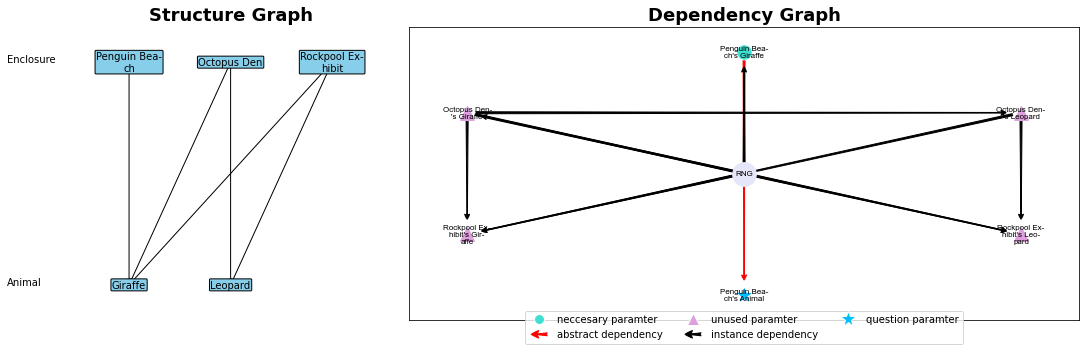

In [7]:
id_gen.problem.draw()